In [110]:
import requests
import os 
import pandas as pd
import matplotlib.pyplot as plt
import warnings;
warnings.simplefilter('ignore')
%matplotlib inline

def getSentiment(ticker):
    
    response = requests.get('https://api.stocktwits.com/api/2/symbols/'+ticker+'/sentiment.json?%20=0.2992325594116798')
    
    data = response.json()['data']
    df = pd.DataFrame(data)
    df.index = pd.DatetimeIndex(df.timestamp,format='%Y/%m/%d')

    df = df[['bearish','bullish']]
    df = df[::-1] #reverse the dataframe

    df.columns = ['Bearish','Bullish']

    if os.path.isfile('./'+ticker+'_SENTIMENT.xls') == False: #if data doesn't exist then generate new file
        df.to_excel(ticker+'_SENTIMENT.xls')
        print(ticker+'_SENTIMENT.xls has been created')
        
    else:
        hd = pd.read_excel(ticker+'_SENTIMENT.xls')
        hd.index = pd.DatetimeIndex(hd.timestamp,format='%Y/%m/%d')
        hd = hd[['Bearish','Bullish']]

        if df.tail(1).index != hd.tail(1).index:
            hd = hd.append(df.tail(1))
            hd.to_excel(ticker+'_SENTIMENT.xls')
            print('New data appended')
        else:
            print('No new data')

In [111]:
Ticker = 'SPY'

getSentiment(Ticker)

No new data


## Read in the data from the generated Excel File

In [112]:
data = pd.read_excel(Ticker+'_SENTIMENT.xls',index_col=0)

## Import the corresponding stock in order to Plot

In [117]:
from alpha_vantage.timeseries import TimeSeries

with open('alphakey.txt') as f:
    key = f.read()

ts = TimeSeries(key=key,output_format='pandas', indexing_type='date')
Stock = ts.get_daily_adjusted(Ticker,outputsize='compact')
Stock = Stock[0]

In [118]:
Stock = pd.DataFrame(Stock['4. close'])

In [119]:
MM = Stock.merge(data,how='outer',left_index=True,right_index=True).dropna().convert_objects(convert_numeric=True)

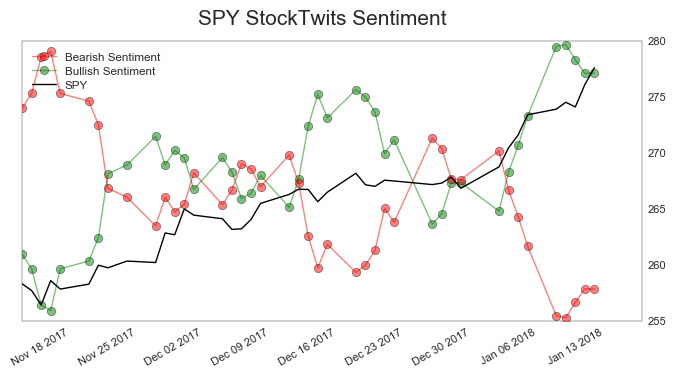

In [120]:
import datetime as datetime

plt.style.use('seaborn-white')
plt.rcParams['axes.linewidth'] = 0.1

fig, ax1 = plt.subplots(figsize=(8,4))
fig.suptitle(Ticker+' StockTwits Sentiment',fontsize=15)

MM.Bullish.plot(ax=ax1,color='green',alpha=0.5,label='Bullish Sentiment',markevery=range(0,len(MM.Bullish)),
                        marker='o',markersize=6)
ax2 = ax1.twinx()
MM.Bearish.plot(ax=ax2,color='red',alpha=0.5,label='Bearish Sentiment',markevery=range(0,len(MM.Bearish)),
                        marker='o',markersize=6)
ax3 = ax1.twinx()
MM['4. close'].plot(ax=ax3,color='black',alpha=1,label=Ticker)

ax1.legend(loc=2, fontsize='small',bbox_to_anchor=(0,0.95))
ax1.set_xlim([MM.index[0], (datetime.datetime.now() + datetime.timedelta(5)).strftime("%Y-%m-%d")])
ax1.set_yticks([])
ax1.tick_params(axis='both', which='major', labelsize=8)

ax2.legend(loc=2, fontsize='small')
ax2.set_xlim([MM.index[0], (datetime.datetime.now() + datetime.timedelta(5)).strftime("%Y-%m-%d")])
ax2.set_yticks([])
ax2.tick_params(axis='both', which='major', labelsize=8)

ax3.legend(loc=2, fontsize='small',bbox_to_anchor=(0,0.9))
ax3.set_xlim([MM.index[0],(datetime.datetime.now() + datetime.timedelta(5)).strftime("%Y-%m-%d")])
ax3.tick_params(axis='both', which='major', labelsize=8)